## Table of Content
#### 1 Importing Libraries and Datasets
#### 2 The elbow technique
#### 3 K-means clustering
#### 4 Descriptive statistics

#### 1 Importing Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
path = 'C:/Users/hp/desktop/Task 6/Task 6.1'

In [3]:
df = pd.read_csv(os.path.join(path, 'matches_clean.csv'))

In [4]:
df.columns

Index(['Unnamed: 0', 'datetime', 'team1', 'team2', 'team1_code', 'team2_code',
       'round', 'score1', 'score2', 'adj_score1', 'adj_score2', 'xG_Shot_Home',
       'xG_Shot_Away', 'xG_Non-Shot_Home', 'xG_Non-Shot_Away', 'group',
       'matchday'],
      dtype='object')

In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.columns

Index(['datetime', 'team1', 'team2', 'team1_code', 'team2_code', 'round',
       'score1', 'score2', 'adj_score1', 'adj_score2', 'xG_Shot_Home',
       'xG_Shot_Away', 'xG_Non-Shot_Home', 'xG_Non-Shot_Away', 'group',
       'matchday'],
      dtype='object')

In [7]:
df = df.drop('datetime', axis=1)

In [8]:
df = df.drop('team1', axis=1)
df = df.drop('team2', axis=1)

In [9]:
df = df.drop('team1_code', axis=1)
df = df.drop('team2_code', axis=1)
df = df.drop('round', axis=1)
df = df.drop('group', axis=1)
df = df.drop('matchday', axis=1)

In [10]:
df.columns

Index(['score1', 'score2', 'adj_score1', 'adj_score2', 'xG_Shot_Home',
       'xG_Shot_Away', 'xG_Non-Shot_Home', 'xG_Non-Shot_Away'],
      dtype='object')

#### 2 The elbow technique

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

[-8176.546679302418,
 -5509.19727182756,
 -4074.9571409463406,
 -3530.481364070293,
 -3088.8614493671935,
 -2759.0766765624917,
 -2574.1140914868074,
 -2406.6335114992553,
 -2298.5874767624523]

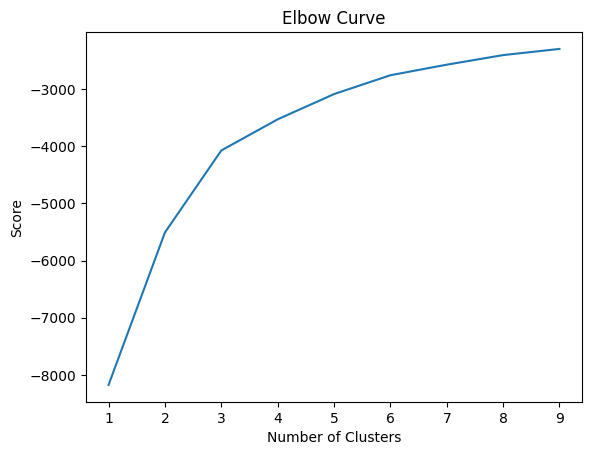

In [13]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Based on the elbow, the optimal number of clusters is 3. After value of 3 on the x-axis the curve flattens out.

#### 3 K-means clustering

In [14]:
kmeans = KMeans(n_clusters = 3) 

In [15]:
kmeans.fit(df)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=3)

In [16]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [17]:
df.head()

,score1,score2,adj_score1,adj_score2,xG_Shot_Home,xG_Shot_Away,xG_Non-Shot_Home,xG_Non-Shot_Away,clusters
0,7,0,6.772,0.00,3.822,0.785,3.875,0.053,0
1,5,0,4.737,0.00,3.312,0.209,2.255,0.857,0
2,1,2,1.050,2.10,0.459,1.425,0.481,0.644,1
3,1,1,1.050,1.05,1.449,0.716,1.169,1.024,2
4,1,1,1.050,1.05,2.592,0.719,1.807,2.302,2


In [18]:
df['clusters'].value_counts()

2    305
1    246
0    193
Name: clusters, dtype: int64

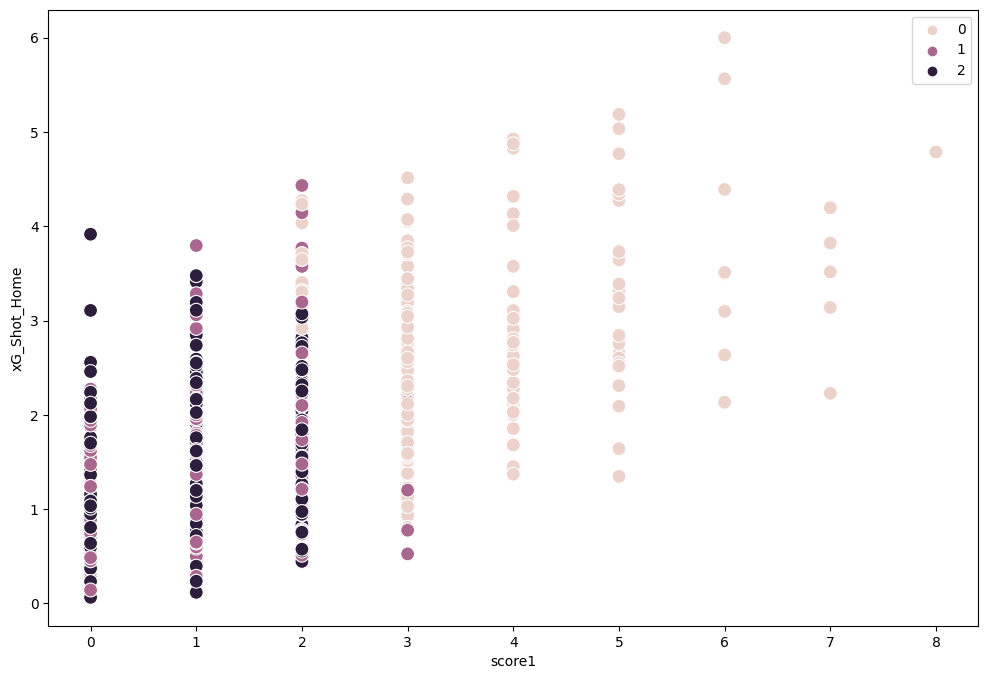

In [19]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['score1'], y=df['xG_Shot_Home'], hue=kmeans.labels_, s=100) 


ax.grid(False) 
plt.xlabel('score1') 
plt.ylabel('xG_Shot_Home') 
plt.show()

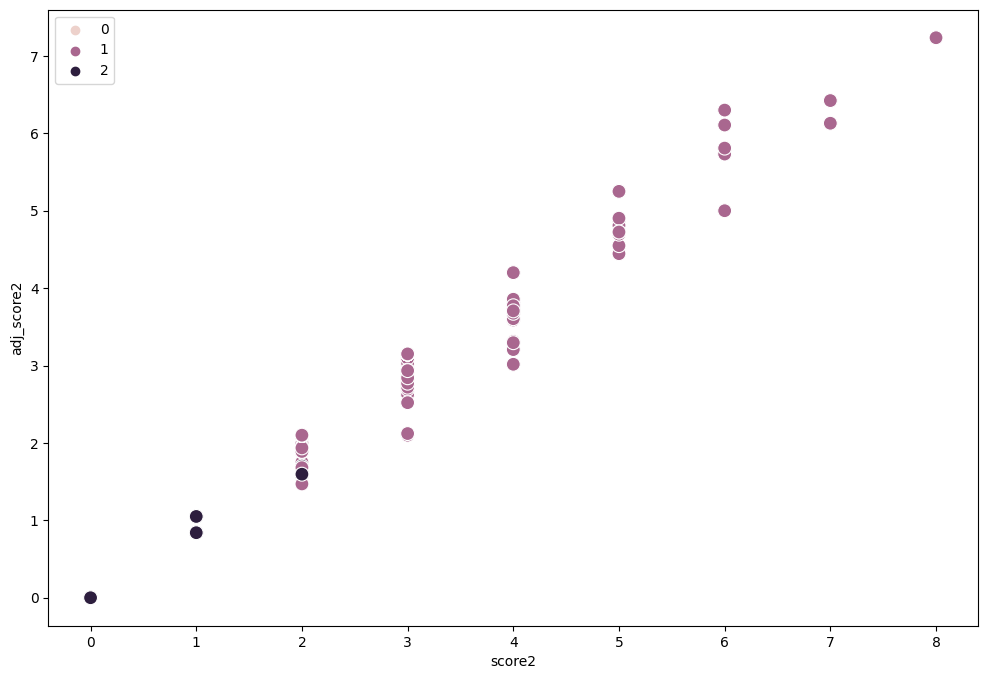

In [23]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['score2'], y=df['adj_score2'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('score2') 
plt.ylabel('adj_score2') 
plt.show()

#### 4 Descriptive statistics

In [21]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [22]:
df.groupby('cluster').agg({'score1':['mean', 'median'], 
                         'adj_score1':['mean', 'median'], 
                         'xG_Shot_Home':['mean', 'median'],
                          'xG_Non-Shot_Home':['mean', 'median'],
                          'score2':['mean', 'median'],
                          'xG_Shot_Away':['mean', 'median'],
                          'xG_Non-Shot_Away':['mean', 'median']})

score1        adj_score1        xG_Shot_Home         \
                 mean median       mean median         mean median   
cluster                                                              
dark purple  1.009836    1.0   1.032275   1.05     1.416862  1.347   
pink         3.616580    3.0   3.540306   3.15     2.730549  2.660   
purple       0.995935    1.0   1.037642   1.05     1.298000  1.203   

            xG_Non-Shot_Home           score2        xG_Shot_Away         \
                        mean median      mean median         mean median   
cluster                                                                    
dark purple         1.437370  1.291  0.577049    1.0     1.049561  0.957   
pink                2.236845  2.070  0.787565    1.0     0.968212  0.834   
purple              1.254248  1.152  2.845528    3.0     2.196317  2.081   

            xG_Non-Shot_Away         
                        mean median  
cluster                              
dark purple         1.182564  1.075  
pink                0.963943  0.866  
purple              1.643809  1.531

### Future Steps

#### The k-means clustering model has showed some general results. However, it would be great to include the categorical variables (especially teams) in the analysis. It would maybe provide a more meaning and accurate results.